#Setup


#### time


In [ ]:
def get_time():
    from datetime import datetime, timedelta
    d = datetime.today() - timedelta(hours=7, minutes=0)
    return d.strftime('%H:%M:%S %p')

In [ ]:
start_time = get_time()
print("start time: %s" % start_time)

start time: 17:42:50 PM


#### imports

In [ ]:
#if havent run in a while, uncomment out line below
#!pip install matplotlib

try:
    import tmtoolkit
except:
    !pip install tmtoolkit
    import tmtoolkit

try:
    from tmtoolkit.topicmod.tm_lda import compute_models_parallel
except:
    !pip install tmtoolkit['lda']
    from tmtoolkit.topicmod.tm_lda import compute_models_parallel

try:
    from lda import LDA
except:
    !pip install lda
    from lda import LDA

import pickle
import scipy.sparse # to work with npz files (document term matrices)
import logging # supress logs from lda
import warnings

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import random
random.seed(20210128)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### loading data

In [ ]:
working_directory = '/content/drive/MyDrive/APRD6343'

#rb for reading it 
doc_labels = pickle.load(open('%s/doc_labels2star.p' % working_directory, 'rb')) #document labels

dtm_sm = scipy.sparse.load_npz('%s/small_dtm2star.npz' % working_directory) #more processed document term matrix
dtm_bg = scipy.sparse.load_npz('%s/big_dtm2star.npz' % working_directory)

vocab_bg = pickle.load(open('%s/big_vocab2star.p' % working_directory, 'rb'))
vocab_sm = pickle.load(open('%s/small_vocab2star.p' % working_directory, 'rb')) #vocab for dtm

corpus = pickle.load(open('%s/corpus2star.p' % working_directory, 'rb')) #original corpus (collection of reviews)

In [ ]:
#logger to ignore warnings (save time)
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

#EVAL BASE BETA AND ALPHA

##set params


In [ ]:
const_params = {'n_iter': 500, 'eta': 0.1, 'random_state': 20210128}
#list of intervals to test for k
ks = list(range(1, 50, 5)) #to inspect range of 50 topics
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, 
    varying_params, 
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 182.17240131369118, 'coherence_mimno_2011': -2.6113980664892305}), (6, {'cao_juan_2009': 0.18367737430237974, 'arun_2010': 103.65712918831221, 'coherence_mimno_2011': -3.073975302587023}), (11, {'cao_juan_2009': 0.15157780844722152, 'arun_2010': 79.09967965014359, 'coherence_mimno_2011': -3.475212285159628}), (16, {'cao_juan_2009': 0.13832439072050637, 'arun_2010': 64.37456647177065, 'coherence_mimno_2011': -3.805312431170961}), (21, {'cao_juan_2009': 0.13643365233849641, 'arun_2010': 53.128538851000805, 'coherence_mimno_2011': -3.6817989714144232}), (26, {'cao_juan_2009': 0.1321814029746373, 'arun_2010': 46.85079163163341, 'coherence_mimno_2011': -3.981925508878426}), (31, {'cao_juan_2009': 0.13214032655055996, 'arun_2010': 43.746523260075904, 'coherence_mimno_2011': -3.9184273917385215}), (36, {'cao_juan_2009': 0.12422806317147711, 'arun_2010': 37.37025584808304, 'coherence_mimno_2011': -4.003169116645037}), (41, {'cao_juan_2009': 0.1280668686

##eval charts

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

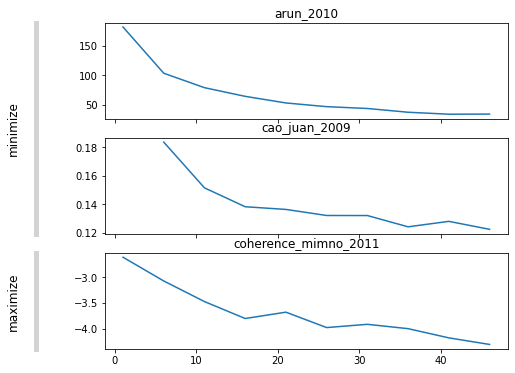

In [ ]:
plot_eval_results(results_by_n_topics)

In [ ]:
get_time()

'17:43:21 PM'

**for eval**
1. arun - look for elbow (low point before increase)
2. cao juan - look for elbow (low point before incerase)
3. coherence - look for max point after initial drop

*note, because none of these are behaving as they should, tweak beta and alpha*

#EVAL WITH LOWER BETA

compare the y axis to see if things are changing

##set params

In [ ]:
const_params = {'n_iter': 500, 'eta': 0.01, 'random_state': 20210128} # changed eta to .01
#list of intervals to test for k
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, 
    varying_params, 
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 182.15387451668107, 'coherence_mimno_2011': -2.6113980664892305}), (6, {'cao_juan_2009': 0.10808447402104386, 'arun_2010': 100.21228086680853, 'coherence_mimno_2011': -3.1354770211740237}), (11, {'cao_juan_2009': 0.15207670474170593, 'arun_2010': 79.68770717597877, 'coherence_mimno_2011': -3.8208614811664985}), (16, {'cao_juan_2009': 0.13203924066622716, 'arun_2010': 63.326286905039225, 'coherence_mimno_2011': -3.7584637333751876}), (21, {'cao_juan_2009': 0.10557572777153236, 'arun_2010': 51.00978024194328, 'coherence_mimno_2011': -4.49638141913737}), (26, {'cao_juan_2009': 0.11748206971515165, 'arun_2010': 45.53469893552136, 'coherence_mimno_2011': -4.3192437535785}), (31, {'cao_juan_2009': 0.10165977288988882, 'arun_2010': 38.15661496573784, 'coherence_mimno_2011': -4.92262631209592}), (36, {'cao_juan_2009': 0.09528879709183366, 'arun_2010': 32.592204172865735, 'coherence_mimno_2011': -4.882887324609795}), (41, {'cao_juan_2009': 0.096854176336

##eval charts

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

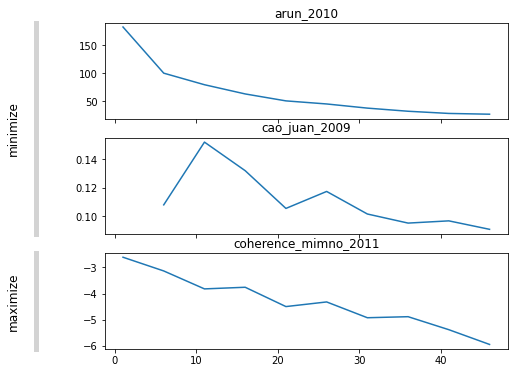

In [ ]:
plot_eval_results(results_by_n_topics)

In [ ]:
get_time()

'17:43:46 PM'

#EVAL WITH HIGHER BETA

*just for fun*

##set params

In [ ]:
const_params = {'n_iter': 500, 'eta': 0.5, 'random_state': 20210128} #changed eta to .5
#list of intervals to test for k
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 1.0}, {'n_topics': 6, 'alpha': 0.16666666666666666}, {'n_topics': 11, 'alpha': 0.09090909090909091}, {'n_topics': 16, 'alpha': 0.0625}, {'n_topics': 21, 'alpha': 0.047619047619047616}, {'n_topics': 26, 'alpha': 0.038461538461538464}, {'n_topics': 31, 'alpha': 0.03225806451612903}, {'n_topics': 36, 'alpha': 0.027777777777777776}, {'n_topics': 41, 'alpha': 0.024390243902439025}, {'n_topics': 46, 'alpha': 0.021739130434782608}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, 
    varying_params, 
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 182.2543768302937, 'coherence_mimno_2011': -2.6113980664892305}), (6, {'cao_juan_2009': 0.2018279442606728, 'arun_2010': 105.25704354938836, 'coherence_mimno_2011': -3.0140092705150914}), (11, {'cao_juan_2009': 0.17149130566302614, 'arun_2010': 83.65229696139163, 'coherence_mimno_2011': -3.2336543511714093}), (16, {'cao_juan_2009': 0.17137433926619575, 'arun_2010': 69.75471009126937, 'coherence_mimno_2011': -3.2889049268952153}), (21, {'cao_juan_2009': 0.1682851810762176, 'arun_2010': 59.10431632559474, 'coherence_mimno_2011': -3.467596093233418}), (26, {'cao_juan_2009': 0.18255911114026235, 'arun_2010': 57.75583903842605, 'coherence_mimno_2011': -3.615795912581289}), (31, {'cao_juan_2009': 0.18105294487830798, 'arun_2010': 52.95019626518949, 'coherence_mimno_2011': -3.6106948622027026}), (36, {'cao_juan_2009': 0.18152545819379717, 'arun_2010': 49.39578543846224, 'coherence_mimno_2011': -3.7629752351243906}), (41, {'cao_juan_2009': 0.18897214065

##eval charts

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

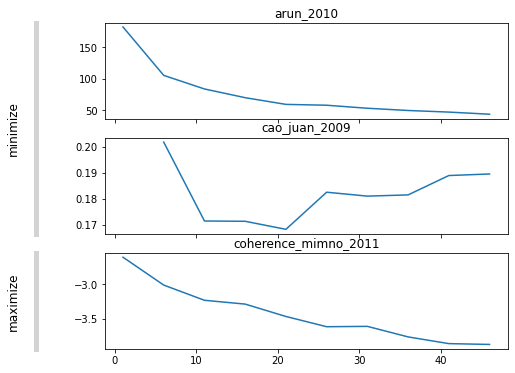

In [ ]:
plot_eval_results(results_by_n_topics)

In [ ]:
get_time()

'17:44:11 PM'

**eval of higher beta:**
1. arun: dont see any true low value 
2. cao juan: no true elbow (arguably a big dip from 21 to 30)
3. coherence: max at K= 20 to *22*?

#EVAL WITH LOWER ALPHA

##set params

In [ ]:
const_params = {'n_iter': 500, 'eta': 0.1, 'random_state': 20210128} # changed eta back to .1
#list of intervals to test for k
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(10*k)) for k in ks] # lower alpha by increasing k 10x
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 6, 'alpha': 0.016666666666666666}, {'n_topics': 11, 'alpha': 0.00909090909090909}, {'n_topics': 16, 'alpha': 0.00625}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 26, 'alpha': 0.0038461538461538464}, {'n_topics': 31, 'alpha': 0.0032258064516129032}, {'n_topics': 36, 'alpha': 0.002777777777777778}, {'n_topics': 41, 'alpha': 0.0024390243902439024}, {'n_topics': 46, 'alpha': 0.002173913043478261}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, 
    varying_params, 
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 182.17240131369118, 'coherence_mimno_2011': -2.6113980664892305}), (6, {'cao_juan_2009': 0.2445603452042184, 'arun_2010': 107.73100431156894, 'coherence_mimno_2011': -2.899003548641668}), (11, {'cao_juan_2009': 0.25695268751768136, 'arun_2010': 89.38947343709341, 'coherence_mimno_2011': -2.9675287792815297}), (16, {'cao_juan_2009': 0.24121747361775647, 'arun_2010': 77.54628039359108, 'coherence_mimno_2011': -3.1786356241308704}), (21, {'cao_juan_2009': 0.24841560793156808, 'arun_2010': 70.21858026274577, 'coherence_mimno_2011': -3.054501524939887}), (26, {'cao_juan_2009': 0.23424566205386646, 'arun_2010': 62.660741403505426, 'coherence_mimno_2011': -3.4752164339386846}), (31, {'cao_juan_2009': 0.237627369393551, 'arun_2010': 58.710661338120005, 'coherence_mimno_2011': -3.4388972871687034}), (36, {'cao_juan_2009': 0.2223699348322829, 'arun_2010': 54.06956191695793, 'coherence_mimno_2011': -3.513650934324602}), (41, {'cao_juan_2009': 0.22567872998

##eval charts

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

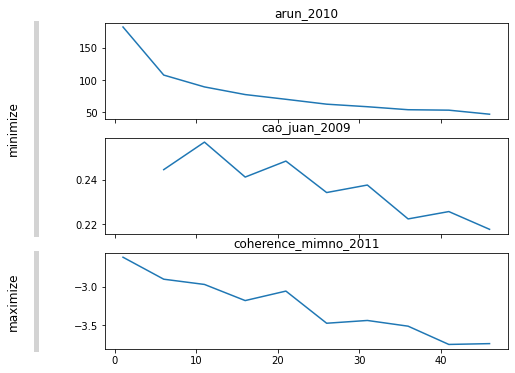

In [ ]:
plot_eval_results(results_by_n_topics)

In [ ]:
get_time()

'17:44:36 PM'

#EVAL WITH SOMEWHAT LOWER ALPHA

##set params

In [ ]:
const_params = {'n_iter': 500, 'eta': 0.1, 'random_state': 20210128} # changed eta to .5
#list of intervals to test for k
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(5*k)) for k in ks] # lower alpha by increasing k 10x
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.2}, {'n_topics': 6, 'alpha': 0.03333333333333333}, {'n_topics': 11, 'alpha': 0.01818181818181818}, {'n_topics': 16, 'alpha': 0.0125}, {'n_topics': 21, 'alpha': 0.009523809523809525}, {'n_topics': 26, 'alpha': 0.007692307692307693}, {'n_topics': 31, 'alpha': 0.0064516129032258064}, {'n_topics': 36, 'alpha': 0.005555555555555556}, {'n_topics': 41, 'alpha': 0.004878048780487805}, {'n_topics': 46, 'alpha': 0.004347826086956522}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, 
    varying_params, 
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 182.17240131369118, 'coherence_mimno_2011': -2.6113980664892305}), (6, {'cao_juan_2009': 0.2243543562257539, 'arun_2010': 106.01440681252458, 'coherence_mimno_2011': -2.933381042604712}), (11, {'cao_juan_2009': 0.22244250446330985, 'arun_2010': 86.80720222900291, 'coherence_mimno_2011': -3.076863132896834}), (16, {'cao_juan_2009': 0.22346157480713144, 'arun_2010': 76.16193653069764, 'coherence_mimno_2011': -3.4333456626729197}), (21, {'cao_juan_2009': 0.22449228853818878, 'arun_2010': 66.73075890814606, 'coherence_mimno_2011': -3.2845163065316183}), (26, {'cao_juan_2009': 0.21043066957059361, 'arun_2010': 59.36853818440491, 'coherence_mimno_2011': -3.4075188566003813}), (31, {'cao_juan_2009': 0.19778742458123194, 'arun_2010': 56.367895065272286, 'coherence_mimno_2011': -3.603226913203448}), (36, {'cao_juan_2009': 0.20742591302523525, 'arun_2010': 48.92090456332189, 'coherence_mimno_2011': -3.555785743057809}), (41, {'cao_juan_2009': 0.1921764758

##eval charts

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

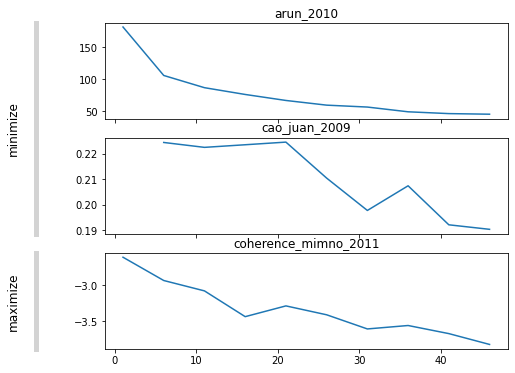

In [ ]:
plot_eval_results(results_by_n_topics)

In [ ]:
get_time()

'17:45:01 PM'

#EVAL WITH LOWER ALPHA AND BETA


##set params

In [ ]:
const_params = {'n_iter': 500, 'eta': 0.01, 'random_state': 20210128} # changed eta to .01
#list of intervals to test for k
ks = list(range(1, 50, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(10*k)) for k in ks] # lower alpha by increasing k 10x
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 6, 'alpha': 0.016666666666666666}, {'n_topics': 11, 'alpha': 0.00909090909090909}, {'n_topics': 16, 'alpha': 0.00625}, {'n_topics': 21, 'alpha': 0.004761904761904762}, {'n_topics': 26, 'alpha': 0.0038461538461538464}, {'n_topics': 31, 'alpha': 0.0032258064516129032}, {'n_topics': 36, 'alpha': 0.002777777777777778}, {'n_topics': 41, 'alpha': 0.0024390243902439024}, {'n_topics': 46, 'alpha': 0.002173913043478261}]


In [ ]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, 
    varying_params, 
    const_params)

In [ ]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 182.15387451668107, 'coherence_mimno_2011': -2.6113980664892305}), (6, {'cao_juan_2009': 0.23690129143977803, 'arun_2010': 107.04143754913066, 'coherence_mimno_2011': -2.732080768698038}), (11, {'cao_juan_2009': 0.26928548133002306, 'arun_2010': 89.04249305174528, 'coherence_mimno_2011': -3.1293990229851856}), (16, {'cao_juan_2009': 0.2466193669200016, 'arun_2010': 74.94211817940645, 'coherence_mimno_2011': -3.4748063817926194}), (21, {'cao_juan_2009': 0.22151142828526985, 'arun_2010': 67.9241782915484, 'coherence_mimno_2011': -3.523368282939476}), (26, {'cao_juan_2009': 0.2177994152756885, 'arun_2010': 58.4836187272894, 'coherence_mimno_2011': -3.416002760301033}), (31, {'cao_juan_2009': 0.2020635848805803, 'arun_2010': 53.36079745408628, 'coherence_mimno_2011': -3.5927465026057455}), (36, {'cao_juan_2009': 0.19224759513927006, 'arun_2010': 47.65048454245437, 'coherence_mimno_2011': -3.7457553819134444}), (41, {'cao_juan_2009': 0.18939180855694

##eval charts

(<Figure size 576x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'arun_2010'}>,
        <AxesSubplot:title={'center':'cao_juan_2009'}>,
        <AxesSubplot:title={'center':'coherence_mimno_2011'}>],
       dtype=object))

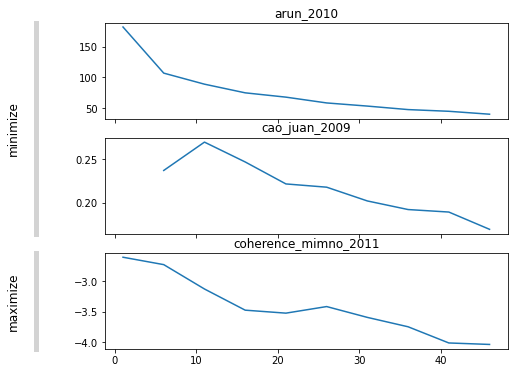

In [ ]:
plot_eval_results(results_by_n_topics)

In [ ]:
end_time = get_time()

# duration


In [ ]:
print("Start time: %s" % start_time)
print("End time: %s" % end_time)

Start time: 17:42:50 PM
End time: 17:45:25 PM
